In [6]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv('training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
rf = RandomForestClassifier(random_state=0)

params = {'n_estimators' : range(10, 51, 10), 'max_depth' : range(1, 13, 2), 'min_samples_leaf'  : range(1, 8), 'min_samples_split' : range(2, 9, 2)}

grid_cv = GridSearchCV(rf, params, n_jobs=-1, cv=3, verbose=1)

In [10]:
grid_cv.fit(X,y)
grid_cv.best_params_

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<Axes: >

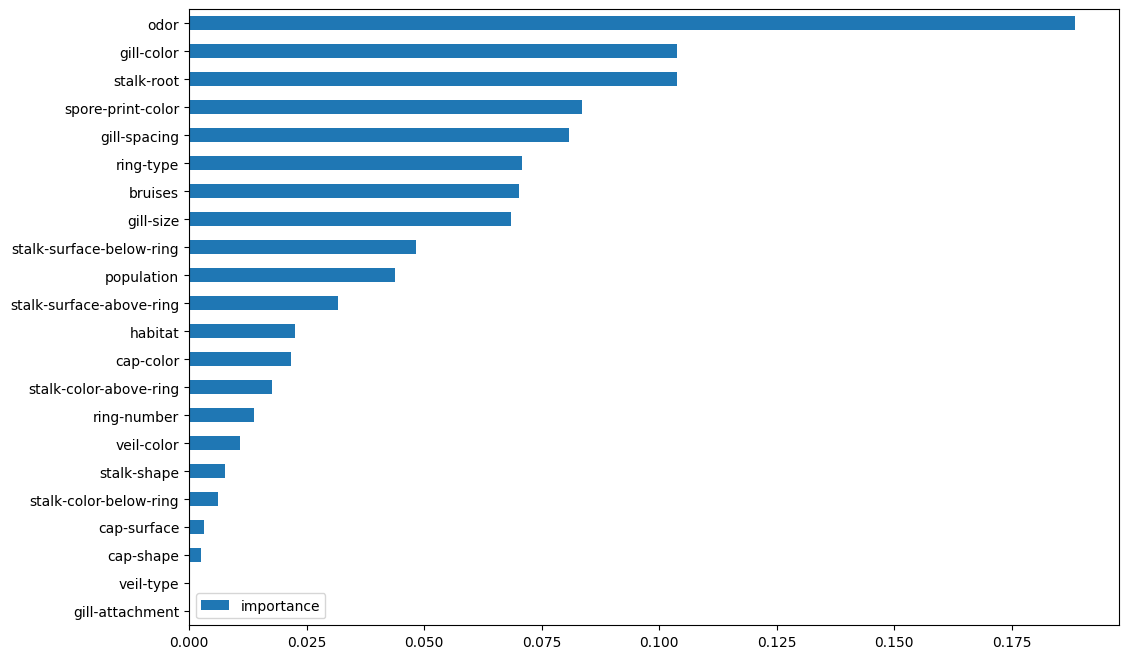

In [13]:
imp = pd.DataFrame(grid_cv.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))